<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
customer_orders=pd.read_csv("/datasets/instacart_orders.csv",sep=";")
product_details=pd.read_csv("/datasets/products.csv",sep=";")
aisles=pd.read_csv("/datasets/aisles.csv",sep=";")
departments=pd.read_csv("/datasets/departments.csv",sep=";")
products_by_order=pd.read_csv("/datasets/order_products.csv",sep=";")

In [3]:
customer_orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
product_details.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
aisles.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
departments.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
products_by_order.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de leer los datos y buenas observaciones iniciales.<br/>

</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
Fue claro que al realizar el primer intento de llamar a info() sobre los dataframes el resultado arrojaba errores, puesto que interpretaba un dataframe de solo una columna donde el nombre de esa columna representaba un string del listado de nombres de columnas pero separados por un punto y coma (esto se percibió en cada uno de los dataframes). Por lo mismo, intuí que esto ocurría por el formato no estandar de los CSV's, lo cual se pudo solucionar usando el parámetro sep=";" para que Python interpretara ese símbolo como separador, y entonces info fuese capaz de distinguis a cada una de las columnas del dataframe.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print("El número de filas duplicadas en este Dataframe es: ",customer_orders.duplicated().sum())
frecuencias_df = customer_orders["order_id"].value_counts().reset_index()
frecuencias_df.columns = ['order_id', 'frecuencia']
repeated_orders=frecuencias_df[frecuencias_df["frecuencia"]!=1]
print(repeated_orders)

El número de filas duplicadas en este Dataframe es:  15
    order_id  frecuencia
0    2125197           2
1    1782114           2
2    1286742           2
3     391768           2
4    1021560           2
5    2232988           2
6     408114           2
7    2282673           2
8    1919531           2
9    2160484           2
10   1918001           2
11    794638           2
12   1112182           2
13    467134           2
14   2845099           2


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Sí existen líneas duplicadas y esto se puede corroborar verificando el listado de id's de órdenes que aparecen más de una vez en el dataframe, puesto que se tiene pensado a esta variable como un identificador UNICO para cada orden generada. Como paso adicional, se podría corroborar que si el número de valores obtenidos en esa lista coincide con el número de filas duplicadas obtenida por la primera linea de código con .duplicated().sum(). Como esto ha ocurrido, se puede confirmar que se tienen ubicadas las líneas de datos duplicados.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
orders_wed=customer_orders[customer_orders["order_dow"]==3]
orders_wed_2am=orders_wed[orders_wed["order_hour_of_day"]==2]
print(orders_wed_2am)
print(orders_wed_2am.count())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?
Suena extraño. Al final del día estaríamos hablando de que 121 órdenes (relacionadas a estos datos) fueron generadas en miércoles a las 2 de la mañana. Pareciera ser un horario complicado como para que una persona requiera hacer un pedido y para que este sea entregado a domicilio.

In [10]:
# Elimina los pedidos duplicados
customer_orders.drop_duplicates(inplace=True)
customer_orders.reset_index(drop=True)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [11]:
# Vuelve a verificar si hay filas duplicadas
print(customer_orders.duplicated().sum())

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

frecuencias_df = customer_orders["order_id"].value_counts().reset_index()
frecuencias_df.columns = ['order_id', 'frecuencia']
repeated_orders=frecuencias_df[frecuencias_df["frecuencia"]!=1]
print(repeated_orders)


Empty DataFrame
Columns: [order_id, frecuencia]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos
Considerando que la línea de código con el método drop_duplicates debería haber eliminado todas las filas duplicadas, es por ello que en mi código genero un nuevo DataFrame el cual solo contenga cada valor de order_id y su frecuencia, para que después con un filtrado !=1 en la columna de frecuencia, o dicho con otras palabras, se filtre a todas las order_id que tengan una frecuencia diferente a 1 (duplicados), se pueda enlistar a estas ordenes duplicadas en un nuevo DataFrame e imprimirlo. Al ya no haber duplicados, este Dataframe debería ser vacío.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los duplicados fueron eliminados correctamente
</div>


### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print("El número de filas duplicadas en este Dataframe es: ",product_details.duplicated().sum())

El número de filas duplicadas en este Dataframe es:  0


In [14]:
# Revisa únicamente si hay ID de productos duplicados
print("El número de productos con ID duplicado en este Dataframe es: ",product_details["product_id"].duplicated().sum())

El número de productos con ID duplicado en este Dataframe es:  0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

product_details['product_name_upper'] = product_details['product_name'].str.upper()
print("El número de productos con nombre duplicado en este Dataframe es: ",product_details["product_name_upper"].duplicated().sum())


El número de productos con nombre duplicado en este Dataframe es:  1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
product_details['product_name_upper'] = product_details[~product_details['product_name'].isna()]['product_name'].str.upper()
print("El número de productos no faltantes con nombre duplicado en este Dataframe es: ",product_details[~product_details["product_name_upper"].isna()]["product_name_upper"].duplicated().sum())


El número de productos no faltantes con nombre duplicado en este Dataframe es:  104


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los datos han sido revisados apropiadamente
</div>


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se puede verificar por la validación de duplicados en filas enteras y en ID de producto que no existen registros duplicados. Sin embargo, se puede percibir 2 observaciones importantes.
1. Desde que se mandó a llamar a info() sobre el Df product_details se pudo observar que se cuenta con un total de 49694 registros pero solo 48436 valores no nulos para la columna product_name. Por lo tanto, tenemos 49694-48436=1258 valores nulos.
2. Al evaluar duplicados en la columna de names (aprovechando nombres con mayúscula), se puede percibir que tenemos en total 1361 valores duplicados, pero considerando que hay 1258 valores nulos, se podría pensar que todos esos valores nulos corresponden a una parcialidad de todos los valores de name duplicados.

Por tanto, se requiere realizar la revisión de duplicados en name que no sean nulos, para confirmar la hipótesis, la cual resulta confirmada puesto que se obtiene por código que el número de productos no faltantes con nombre duplicado es de 104, que a su vez resulta también de 1361 valores duplicados totales - 1258 valores nulos = 103 + 1 de NaN. = 104.

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
print("El número de filas duplicadas en este Dataframe es: ",departments.duplicated().sum())

El número de filas duplicadas en este Dataframe es:  0


In [19]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print("El número de ID de departamentos duplicados en este Dataframe es: ",departments["department_id"].duplicated().sum())

El número de ID de departamentos duplicados en este Dataframe es:  0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se hizo la revisión de duplicados por medio de la aplicación de .duplicated() en todo el Dataframe y en solo la columna de "department_id", con la intención de asegurar que no existan valores duplicados (puesto que este último campo está considerado como un identificador único para cada departamento). Como en ambos escenarios se obtiene que no existen valores o filas duplicadas, entonces se puede dar por hecho que no existen elementos duplicados en este Dataframe.

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print("El número de filas duplicadas en este Dataframe es: ",aisles.duplicated().sum())

El número de filas duplicadas en este Dataframe es:  0


In [21]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print("El número de ID de pasillos duplicados en este Dataframe es: ",aisles["aisle_id"].duplicated().sum())

El número de ID de pasillos duplicados en este Dataframe es:  0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se hizo la revisión de duplicados por medio de la aplicación de .duplicated() en todo el Dataframe y en solo la columna de "aisle_id", con la intención de asegurar que no existan valores duplicados (puesto que este último campo está considerado como un identificador único para cada pasillo). Como en ambos escenarios se obtiene que no existen valores o filas duplicadas, entonces se puede dar por hecho que no existen elementos duplicados en este Dataframe.

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print("El número de filas duplicadas en este Dataframe es: ",products_by_order.duplicated().sum())

El número de filas duplicadas en este Dataframe es:  0


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
products_by_order["orders_ordered"] = products_by_order["order_id"].astype(str) + "-" + products_by_order["add_to_cart_order"].astype(str)
print("El número de ID de órdenes duplicados en este Dataframe es: ", products_by_order["orders_ordered"].duplicated().sum())
products_by_order_special = products_by_order[~products_by_order["add_to_cart_order"].isna()]
print("El número de ID de órdenes duplicados no nulos en este Dataframe es: ", products_by_order_special["orders_ordered"].duplicated().sum())

El número de ID de órdenes duplicados en este Dataframe es:  766
El número de ID de órdenes duplicados no nulos en este Dataframe es:  0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Debido a que no fue posible encontrar filas que sean duplicadas dentro del dataframe, es posible abordar otras teorías con las cuales se pueda encontrar duplicados implícitos y una de esas hipótesis es mediante la generación de un concatenado entre el id de la orden con el valor secuencial de la columna "add_to_cart_order". Esto se sugiere debido a que el Id de la orden se considera un valor que será único por cada orden, pero como el propósito de este dataframe es enlistar todos los productos agregados a cada orden y se enlista un producto por fila, es normal esperar que se encuentre con duplicados por cada fila. Por tanto, el concatenado entre ID de orden y el valor secuencial de productos agregado al carrito sí debería ser un tipo de valor en el que no se esperen valores duplicados, puesto que en caso de existir, esto supondría que existen datos duplicados (que esto no puede ser del todo cierto porque faltaría conocer si pueden existir escenarios en los que se pueda retrabajar en un Id de orden de venta que ya ha sido utilizado). Por ello, se gener auna primer línea en donde valores como order_id y add_to_cart_order son transformados a string para poder generar un concatenado de estos, y sobre esta nueva columna de concatenados, generar el análisis de duplicados. En la segunda línea de código se procesa el conteo de duplicados y se obtiene un resultado de 766 duplicados dentro de un total de 4545007 valores.
Sin embargo, se identifica por medio de la llamada a info() que la columna add_to_cart_order que existen ciertas filas que cuentan con valor nulo en la misma columna, por lo que debido a esos valores nulos se podría deber que existan los 766 valores concatenados duplicados, por lo que se procede a crear otro Dataframe de apoyo, en donde se copie el dataframe de products_by_order entero pero con el filtro de todos los valores no nulos de la columna add_to_cart_order, de tal forma que con este nuevo Dataframe de apoyo se vuelva a hacer el análisis de valores concatenados duplicados. Al realizar el análisis, se percibe que no existe valores duplicados, por lo que se cumple la hipótesis de que los 766 valores duplicados de string "order_id y add_to_cart_order" se debía por los valores nulos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Estos últimos dataframes no cuentan con filas totalmente duplicadas.

</div>


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
print("El número de valores nulos en la columna product_name del dataframe son:",product_details["product_name"].isna().sum())
print(product_details[product_details["product_name"].isna()])

print(product_details[product_details["product_name"].isna()].sample(20))

El número de valores nulos en la columna product_name del dataframe son: 1258
       product_id product_name  aisle_id  department_id product_name_upper
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 column

Describe brevemente cuáles son tus hallazgos.
Hace sentido con base en los resultados percibidos en la llamada de info() en product_details, puesto que se tiene un total de 49,694 filas de datos y se cuentan 48,436 valores no nulos en la columna. 49,694 - 48,436 = 1,258 valores nulos.

Haciendo el análisis de cuáles son los valores nulos en la columna product_name, y solicitando a Python en múltiples ocasiones que me regrese una lista aleatoria de 20 valores de esa lista de filas con valor nulo en product_name, se logra percibir que existe un patrón de esos datos. Pareciera que la gran mayoría, si no es que todas las filas con valor nulo en product_name tienen la coincidencia de que se tiene el valor 100 en aisle_id y el valor de 21 en department_id. 

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

null_product_names=product_details[product_details["product_name"].isna()]
print(null_product_names[null_product_names["aisle_id"]!=100])


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id, product_name_upper]
Index: []


Describe brevemente cuáles son tus hallazgos.
Es correcta la pregunta generada. Eso se puede comprobar con la impresión generada que corresponde a un dataframe de apoyo generado donde solo se contiene los datos del dataframe product_details original que tenga valores nulos en la columna product_name. La impresión se realiza haciendo un nuevo filtrado, en donde solo se manda a llamar a los valores del Dataframe de apoyo, que tenga valores diferentes a 100 en la columna aisle_id, pero al comprobar que nos arroja que el Dataframe solicitado a impresión está vacío, se confirma la pregunta inicial.

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
null_product_names=product_details[product_details["product_name"].isna()]
print(null_product_names[null_product_names["department_id"]!=21])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id, product_name_upper]
Index: []


Describe brevemente cuáles son tus hallazgos.
Es correcta la pregunta generada. Eso se puede comprobar con la impresión generada que corresponde a un dataframe de apoyo generado donde solo se contiene los datos del dataframe product_details original que tenga valores nulos en la columna product_name. La impresión se realiza haciendo un nuevo filtrado, en donde solo se manda a llamar a los valores del Dataframe de apoyo, que tenga valores diferentes a 21 en la columna department_id, pero al comprobar que nos arroja que el Dataframe solicitado a impresión está vacío, se confirma la pregunta inicial.

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print("Los datos del departamento 21 son:\n", departments[departments["department_id"]==21])
print("Los datos del pasillo 100 son:\n", aisles[aisles["aisle_id"]==100])

Los datos del departamento 21 son:
     department_id department
20             21    missing
Los datos del pasillo 100 son:
     aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.
Se encuentra con el descubrimiento que pareciera que se encuentra efectivamente con registros del departamento 21 y del pasillo 100. Sin embargo, curiosamente se encuentra con que no se tiene un detalle claro del enfoque que tienen tanto el departamento como el pasillo, puesto que ambos tienen el valor "missing" en las columnas department y aisle, respectivamente.

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
product_details["product_name"].fillna("Unknown",inplace=True)
print("El número de valores nulos en la columna product_name del dataframe son:",product_details["product_name"].isna().sum())

El número de valores nulos en la columna product_name del dataframe son: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se puede corroborar que efectivamente se ha eliminado todo valor nulo de la columna product_name por medio del uso de fillna y el llenado de "Unknown" en esos valores nulos, ya que al mandar a contar los valores nulos en la misma columna con isna(), ya encontramos que tenemos un número de valores nulos = 0. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


### `orders` data frame

In [29]:
# Encuentra los valores ausentes
print("El número de valores nulos del dataframe son:",customer_orders["days_since_prior_order"].isna().sum())
print(customer_orders[customer_orders["days_since_prior_order"].isna()])

El número de valores nulos del dataframe son: 28817
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96   

In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
null_values_customer_orders=customer_orders[customer_orders["days_since_prior_order"].isna()]
print("El listado de filas que tienen valor nulo en la columna days_since_prior_order y que tienen un valor diferente a 1 en order_number es:\n",null_values_customer_orders[null_values_customer_orders["order_number"]!=1])

El listado de filas que tienen valor nulo en la columna days_since_prior_order y que tienen un valor diferente a 1 en order_number es:
 Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.
En un primer inicio, mediante la info obtenida de la llamada a info() en customer_orders se detecta que la única columna que cuenta con valores nulos es days_since_prior_order, por lo que se hace el llamado de dichas líneas para hacer un análisis y generación de hipótesis de qué pasa con esos valores. Tal como se cuestiona posteriormente, pareciera que la tendencia es que todas las filas que cumplen con la premisa de valores nulos en days_since_prior_order es que todas tienen valor = 1 en columna order_number, y eso se puede corroborar con las últimas dos líneas de código, en el que se crea un dataframe de apoyo donde se guardan todas las líneas del dataframe original que tienen valor nulo en la columna de interés, y luego se manda a imprimir ese nuevo dataframe con un nuevo filtrado, buscando imprimir todas las filas que no tengan valor = 1 en la columna order_number. Al resultar un dataframe vacío, se puede confirmar que hablamos de que todas las gilas del dataframe original con valores ausentes coinciden con tener valor = 1 en order_number.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Buena manera de revisar los datos y encontrar que no hay ausentes que no sean un primer pedido
</div>


### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
print("El número de valores nulos del dataframe son:",products_by_order["add_to_cart_order"].isna().sum())
print(products_by_order[products_by_order["add_to_cart_order"].isna()])

El número de valores nulos del dataframe son: 836
         order_id  product_id  add_to_cart_order  reordered orders_ordered
737       2449164        5068                NaN          0    2449164-nan
9926      1968313       43867                NaN          0    1968313-nan
14394     2926893       11688                NaN          0    2926893-nan
16418     1717990        4142                NaN          0    1717990-nan
30114     1959075       42828                NaN          1    1959075-nan
...           ...         ...                ...        ...            ...
4505662   1800005        7411                NaN          0    1800005-nan
4511400   1633337         260                NaN          0    1633337-nan
4517562    404157        9517                NaN          0     404157-nan
4534112   1673227       17835                NaN          0    1673227-nan
4535739   1832957       17949                NaN          1    1832957-nan

[836 rows x 5 columns]


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("Los valores mínimo y máximo de la columna add_to_cart_order son:",products_by_order["add_to_cart_order"].min(),products_by_order["add_to_cart_order"].max())

Los valores mínimo y máximo de la columna add_to_cart_order son: 1.0 64.0


Describe brevemente cuáles son tus hallazgos.
Al menos hasta el momento no pareciera que haya una hipótesis de patrón percibible en los datos de las filas obtenidas con valor nulo en la columna add_to_cart_order. Habría que hacer una investigación mayor.

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

ids_without_atco=products_by_order[products_by_order["add_to_cart_order"].isna()]["order_id"]
ids_without_atco.reset_index(drop=True,inplace=True)
print(ids_without_atco)


0      2449164
1      1968313
2      2926893
3      1717990
4      1959075
        ...   
831    1800005
832    1633337
833     404157
834    1673227
835    1832957
Name: order_id, Length: 836, dtype: int64


In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
orders_without_atco=products_by_order[products_by_order["add_to_cart_order"].isna()]
orders_grouped=orders_without_atco.groupby(by="order_id")["product_id"].count()
print("Conteo de productos por pedido con valores ausentes:")
print(orders_grouped)
print("\nValor mínimo del conteo:",orders_grouped.min())
print("\nValor máximo del conteo:",orders_grouped.max())

Conteo de productos por pedido con valores ausentes:
order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64

Valor mínimo del conteo: 1

Valor máximo del conteo: 63


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!<br/>
    
El valor minimo para ordenes que tienen valores nulos es `65`, te dejo el código en la celda de abajo
</div>


In [36]:
# Código del revisor
products_by_order[products_by_order['order_id'].isin(orders_without_atco['order_id'])].groupby('order_id')['product_id'].count().min()

65

Describe brevemente cuáles son tus hallazgos.
Resulta que la hipotesis plateada respecto a si todos los pedidos con valores ausentes tienen más de 64 productos resultó ser falsa, puesto que podemos ver de la lista obtenida arriba que existen órdenes con un número de productos menor a 64.

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
products_by_order["add_to_cart_order"].fillna(999,inplace=True)
products_by_order["add_to_cart_order"].astype("int")

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Este escenario relacionado al dataframe de productos por orden fue el más complicado, puesto que no fue tan sencillo generar una hipótesis de un posible patrón en los datos que dictara el motivo de por qué ciertos datos de la columna add_to_cart_order eran valores nulos. Se pudo corroborar con la agrupación y conteo generado anteriormente que el patrón de todos los pedidos con valores ausentes tienen más de 64 productos no era correcto, por lo que simplemente se volvió más sencillo, para efectos de evitar los valores nulos, asignarles un valor genérico a cada uno de ellos, que en este caso fue el valor 999.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
La etapa del preprocesamiento de datos adquiere uan relevancia enorme puesto que, un analista de datos no puede prescindir de esta etapa en la manipulación de datos porque podría sesgar y generar conclusiones erroneas al momento de generar la visualización de los datos. Siempre es muy importante hacer la validación de valores duplicados, generar hipótesis y comprobarlas para obtener la realidad de los motivos por los cuales existen valores duplicados, y hacer la correcta gestión de la corrección o eliminación de datos duplicados. El mismo proceso es aplicable para datos ausentes o nulos.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [37]:
if customer_orders["order_hour_of_day"].min()==0:
    if customer_orders["order_hour_of_day"].max()==23:
        #Si se cumplen los dos condicionales, entonces se imprimirá que los datos son sensibles (razonables)
        print("Los valores de la columna order_hour_of_day efectivamente oscilan entre 0 y 23")
    #Con cualquiera de las dos condiciones que no se cumplan, entonces se imprimirá que los datos no razonables
    else:
        print("Los valores de la columna order_hour_of_day no oscilan entre 0 y 23")
else:
    print("Los valores de la columna order_hour_of_day no oscilan entre 0 y 23")

Los valores de la columna order_hour_of_day efectivamente oscilan entre 0 y 23


In [38]:
if customer_orders["order_dow"].min()==0:
    if customer_orders["order_dow"].max()==6:
        #Si se cumplen los dos condicionales, entonces se imprimirá que los datos son sensibles (razonables)
        print("Los valores de la columna order_dow efectivamente oscilan entre 0 y 6")
    #Con cualquiera de las dos condiciones que no se cumplan, entonces se imprimirá que los datos no razonables
    else:
        print("Los valores de la columna order_dow no oscilan entre 0 y 6")
else:
    print("Los valores de la columna order_dow no oscilan entre 0 y 6")

Los valores de la columna order_dow efectivamente oscilan entre 0 y 6


Escribe aquí tus conclusiones
Es razonable hacer uso de las columnas order_hour_of_day y order_dow porque los datos contemplados en dichas columnas contienen valores están considerados dentro de intervalos que representan correctamente las variables por las que fueron diseñadas; en este caso la hora y el día de la semana en que fue generada la orden.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Se verificó que los datos sean sensibles correctamente
</div>


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

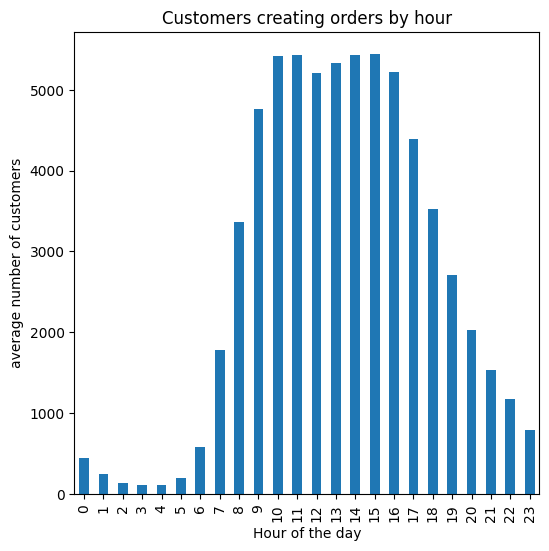

In [39]:
#Agrupación del Dataframe de órdenes por día y hora de generación de la órden, y se conserva el campo de ID de usuario para hacer el conteo de personas que hacen órdenes por cada hora.
users_by_day_hour = customer_orders.groupby(['order_dow', 'order_hour_of_day'])['user_id'].nunique().reset_index()
users_by_day_hour.columns = ['day_of_week', 'hour_of_day', 'unique_users']
#Para obtener el promedio de usuarios que han generado ordenes por cada hora, alrededor de todos los días de la semana
avg_users_by_hour = users_by_day_hour.groupby('hour_of_day')['unique_users'].mean().reset_index()
avg_users_by_hour.columns = ['hour_of_day', 'avg_users']
#para generar gráfica
avg_users_by_hour.plot(x="hour_of_day",y="avg_users",kind="bar",xlabel="Hour of the day",ylabel="average number of customers",title="Customers creating orders by hour",figsize=[6,6],legend=False)
plt.show()

Escribe aquí tus conclusiones
Gracias a la gráfica se puede concluir que el horario en el que comúnmente hay un mayor pico de órdenes generadas es en los intervalos de 10-11 y también muy cerca está a las 14-15.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Buena manera de presentar los datos
</div>


### [A3] ¿Qué día de la semana compran víveres las personas?

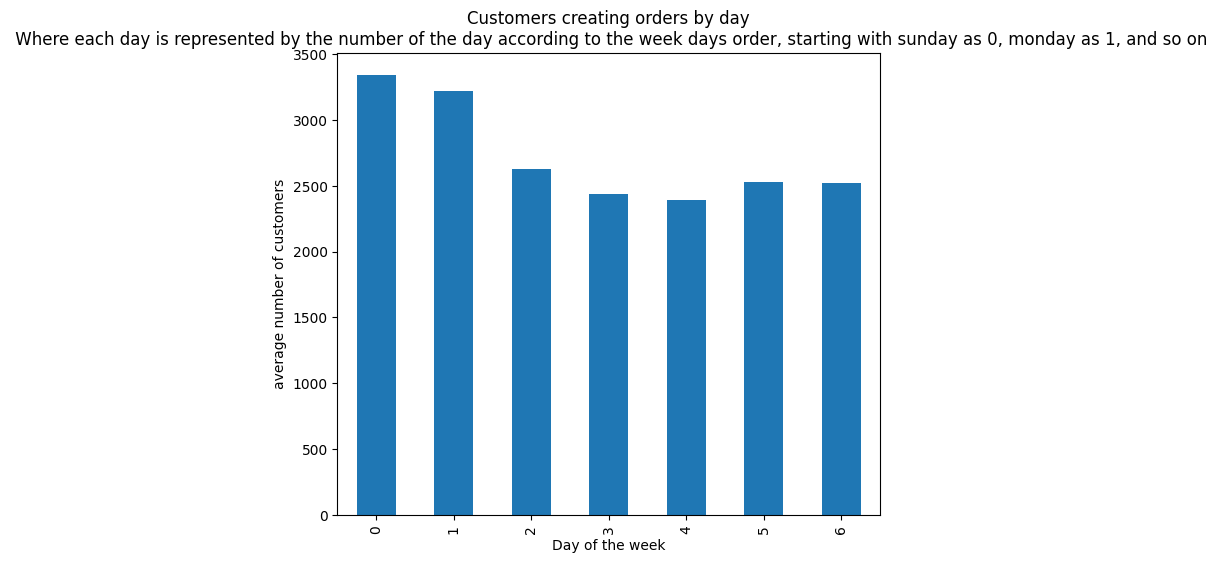

In [40]:
#para agrupar el Datframe de las órdenes por hora y día de generación de orden (en esa misma jerarquía) y conservación de la columna de ID de usuario para hacer el conteo de personas que generan órdenes por día
users_by_day_hour_2 = customer_orders.groupby(['order_hour_of_day', 'order_dow'])['user_id'].nunique().reset_index()
users_by_day_hour_2.columns = ['hour_of_day', 'day_of_week', 'unique_users']
#para obtener el promedio de usuarios que han generado ordenes por cada día, considerando el total de horas de cada día
avg_users_by_hour_2= users_by_day_hour_2.groupby('day_of_week')['unique_users'].mean().reset_index()
avg_users_by_hour_2.columns = ['day_of_week', 'avg_users']
#para generar gráfica
avg_users_by_hour_2.plot(x="day_of_week",y="avg_users",kind="bar",xlabel="Day of the week",ylabel="average number of customers",title="Customers creating orders by day\n Where each day is represented by the number of the day according to the week days order, starting with sunday as 0, monday as 1, and so on",figsize=[7,6],legend=False)
plt.show()

Escribe aquí tus conclusiones
Gracias a la gráfica se puede concluir que el día en el que comúnmente hay un mayor pico de órdenes generadas es en domingo, y muy cerca de este el lunes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Los domingos son los días preferidos de los clientes
</div>


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

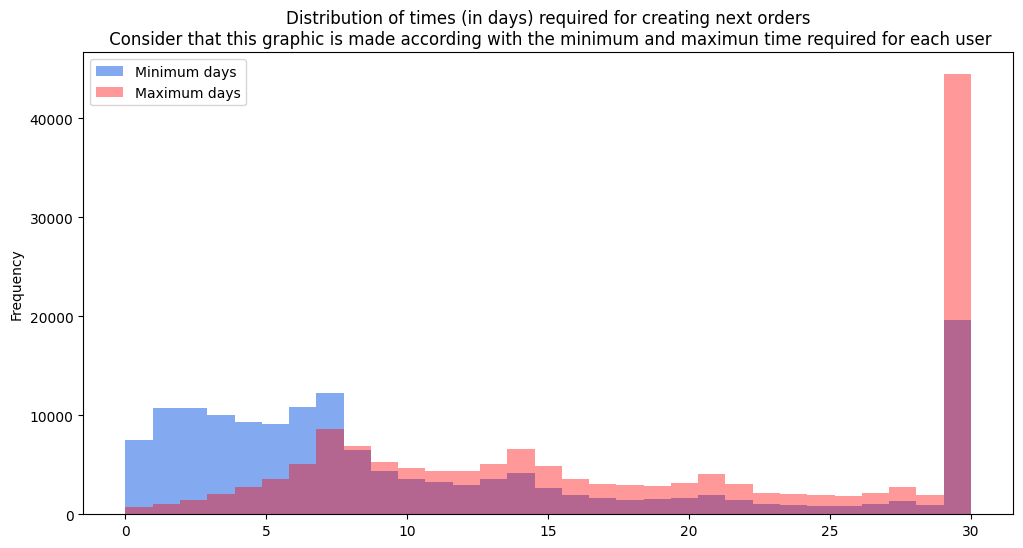

In [42]:
#para obtener el valor mínimo de días de espera que se lleva cada cliente en generar una nueva orden
dspo_min=customer_orders.groupby("user_id")["days_since_prior_order"].min().reset_index()
#para obtener el valor máximo de días de espera que se lleva cada cliente en generar una nueva orden
dspo_max=customer_orders.groupby("user_id")["days_since_prior_order"].max().reset_index()
dspo_min.columns=["user_id","dspo_minimum"]
dspo_max.columns=["user_id","dspo_maximum"]
#impresión de histogramas con respecto a los posibles valores de cantidad de días mínimo y máximo que esperan los usuarios para generar una nueva orden
dspo_min["dspo_minimum"].plot(kind="hist",title="Distribution of times (in days) required for creating next orders\n Consider that this graphic is made according with the minimum and maximun time required for each user",figsize=[12,6],bins=31,alpha=0.8,color="cornflowerblue")
dspo_max["dspo_maximum"].plot(kind="hist",title="Distribution of times (in days) required for creating next orders\n Consider that this graphic is made according with the minimum and maximun time required for each user",figsize=[12,6],bins=31,alpha=0.4,color="red")
plt.legend(["Minimum days","Maximum days"])
plt.show()




<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Los resultados son correctos
<br />
Hasta este punto no podemos saber si realmente los usuarios esperan 30 días para realizar otra compra o es el sistema el que agrupa todas las compras que sean mayores a 30 días en el día 30. Con la gráfica podemos observar que la mayoría de usuarios se concentra entre 1 y 9 días donde después los números descienden gradualmente
</div>


Escribe aquí tus conclusiones
Acorde a la gráfica, se puede concluir que la moda (valor más frecuente) para los tiempos (en días) que requieren los usuarios para crear una nueva orden son:
Mínimo: 30 días. Esto se puede deber a que haya registros de usuarios que tengan un número muy reducido de ordenes registradas en el Dataframe que cumplan con la condición de que cada orden fue ejecutada 30 días después de la anterior orden.
Máximo: 30 días

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

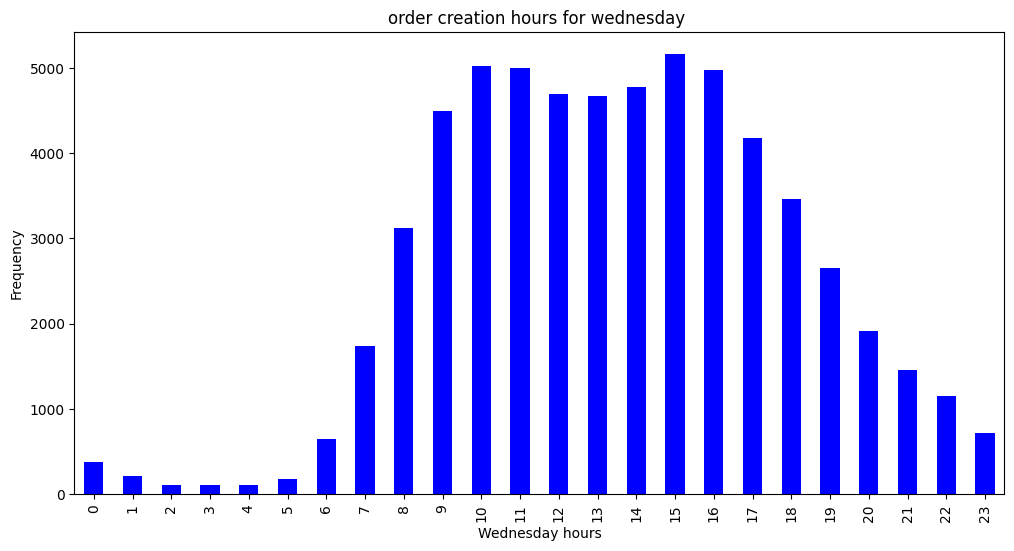

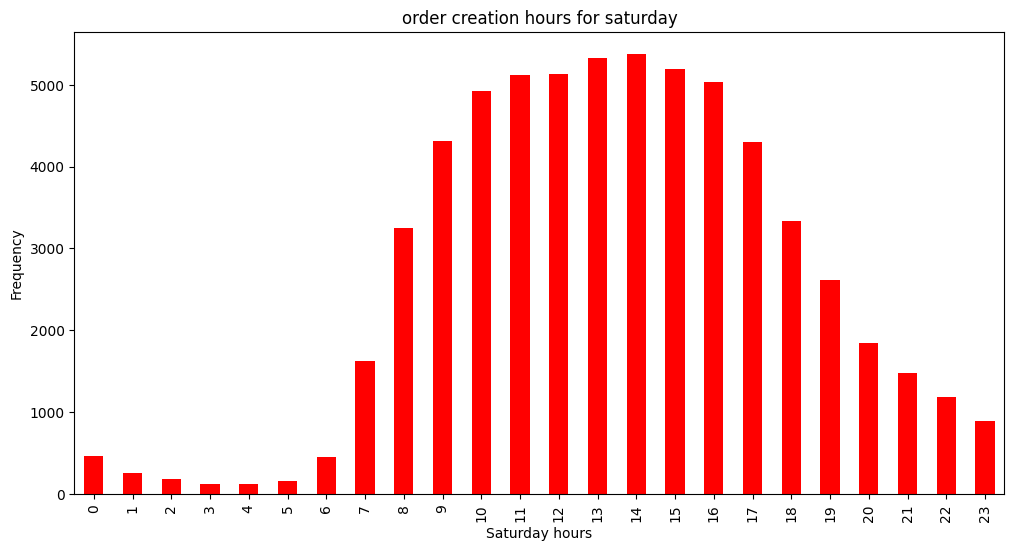

In [43]:
#para obtener la diferencia, por día, de los comportamientos de órdenes por hora.
ohod_per_day=customer_orders.groupby("order_dow")["order_hour_of_day"].value_counts().reset_index(name="frequency")
#para generar dos dataframes para separar, entre miércoles y sábado, los comportamientos de órdenes por hora; así como ordenar los dataframes por orden cronológico de las horas
ohod_per_day_wed=ohod_per_day.query("order_dow==3").sort_values(by="order_hour_of_day",ascending=True)
ohod_per_day_sat=ohod_per_day.query("order_dow==6").sort_values(by="order_hour_of_day",ascending=True)
#para impresión de gráficas de barras de horas del día vs número de órdenes generadas. Una gráfica para miércoles y sábado, respectivamente. 
ohod_per_day_wed.plot(kind="bar",x="order_hour_of_day",y="frequency",xlabel="Wednesday hours",ylabel="Frequency",title="order creation hours for wednesday ",figsize=[12,6],color="blue",legend=False)
ohod_per_day_sat.plot(kind="bar",x="order_hour_of_day",y="frequency",xlabel="Saturday hours",ylabel="Frequency",title="order creation hours for saturday",figsize=[12,6],color="red",legend=False)
plt.show()

Escribe aquí tus conclusiones.
Se puede percibir que el comportamiento es relativamente similar, como a manera de una campana, pero se perciben ligerias diferencias de comportamiento, tales como que en los miércoles hay una alta demanda entre las 10 y 11 am, pero existe un decremento en la demanda entre las 12 pm y 2 pm, para volver a crecer a las 3 pm. Por otra parte, en sabados no existe ese comportamiento de crestas y valles, puesto que se puede ver que incrementa la demanda hasta llegar a las 2 pm, para luego progresivamente comenzar a disminuir la demanda.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!
<br />
Buena manera de mostrar los resultados de ambos días 
</div>


### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

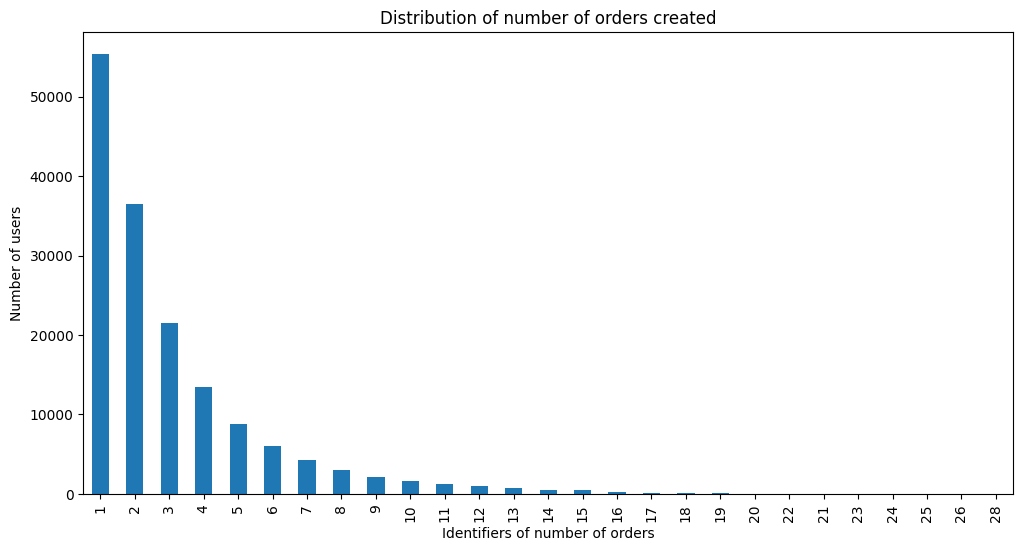

In [44]:
#para agrupar todas las órdenes generadas y contarlas por cada cliente
orders_by_user=customer_orders.groupby("user_id")["order_id"].count().reset_index()
orders_by_user.columns=["user_id","total_number_of_orders"]
#para reconocer la distribución de los posibles valores respecto a número de órdenes generadas por cada usuario
order_distribution=orders_by_user["total_number_of_orders"].value_counts().reset_index()
order_distribution.columns=["total_number_of_orders","distribution"]
#para generar gráfica de barras de {posibles cantidades totales de órdenes generadas por cliente} vs {frecuencia}
order_distribution.plot(kind="bar",x="total_number_of_orders",y="distribution",xlabel="Identifiers of number of orders",ylabel="Number of users",title="Distribution of number of orders created",figsize=[12,6],legend=False)
plt.show()

Escribe aquí tus conclusiones
Se puede percibir que el comportamiento es de decremento en el número de usuarios conforme vamos hablando de un número mayor de cantidad total de órdenes creadas por cliente. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/> 

La mayoría de usuarios no ha hecho muchos pedidos, buenas observaciones.

</div>


### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

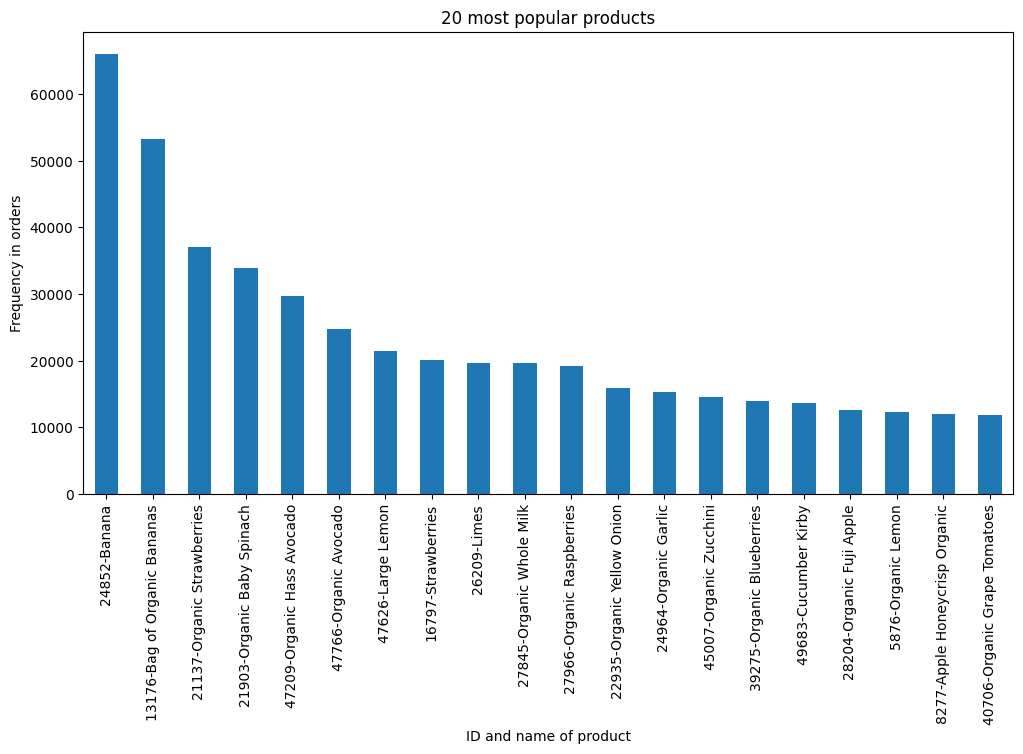

In [45]:
#Uso del dataframe de listado de productos por órden, para obtener el número de órdenes en las que cada producto fue ordenado.
most_popular=products_by_order.groupby("product_id")["order_id"].count().reset_index(name="frequency")
#fusión del dataframe generado en paso anterior con el de los detalles de producto para juntar en un solo dataframe el ID y nombre de producto
product_details=product_details.merge(most_popular,on="product_id",how="left")
#ordenamiento de nuevo dataframe por la frecuencia en que un producto fue solicitado en una orden (de forma descendente) y extracción de los 20 primeros elementos
most_popular_20=product_details.sort_values(by="frequency",ascending=False).head(20)
#concatenado de id y nombre de producto para efectos del resultado esperado
most_popular_20["id_and_name"]=most_popular_20["product_id"].astype(str)+"-"+most_popular_20["product_name"]
#impresión de gráfica de barras de {id y nombre d eproducto} vs {frecuencia de aparición en órdenes}
most_popular_20.plot(kind="bar",x="id_and_name",y="frequency",xlabel="ID and name of product",ylabel="Frequency in orders",title="20 most popular products",figsize=[12,6],legend=False)
plt.show()

Escribe aquí tus conclusiones.
El producto más vendido es el plátano, seguido por plátanos orgánicos, fresas orgánicas, espinaca baby orgánica y otros productos más

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Los resultados son acertados!<br/>
Los clientes tienden a comprar productos naturales, buena manera de mostrar los resultados
</div>


# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

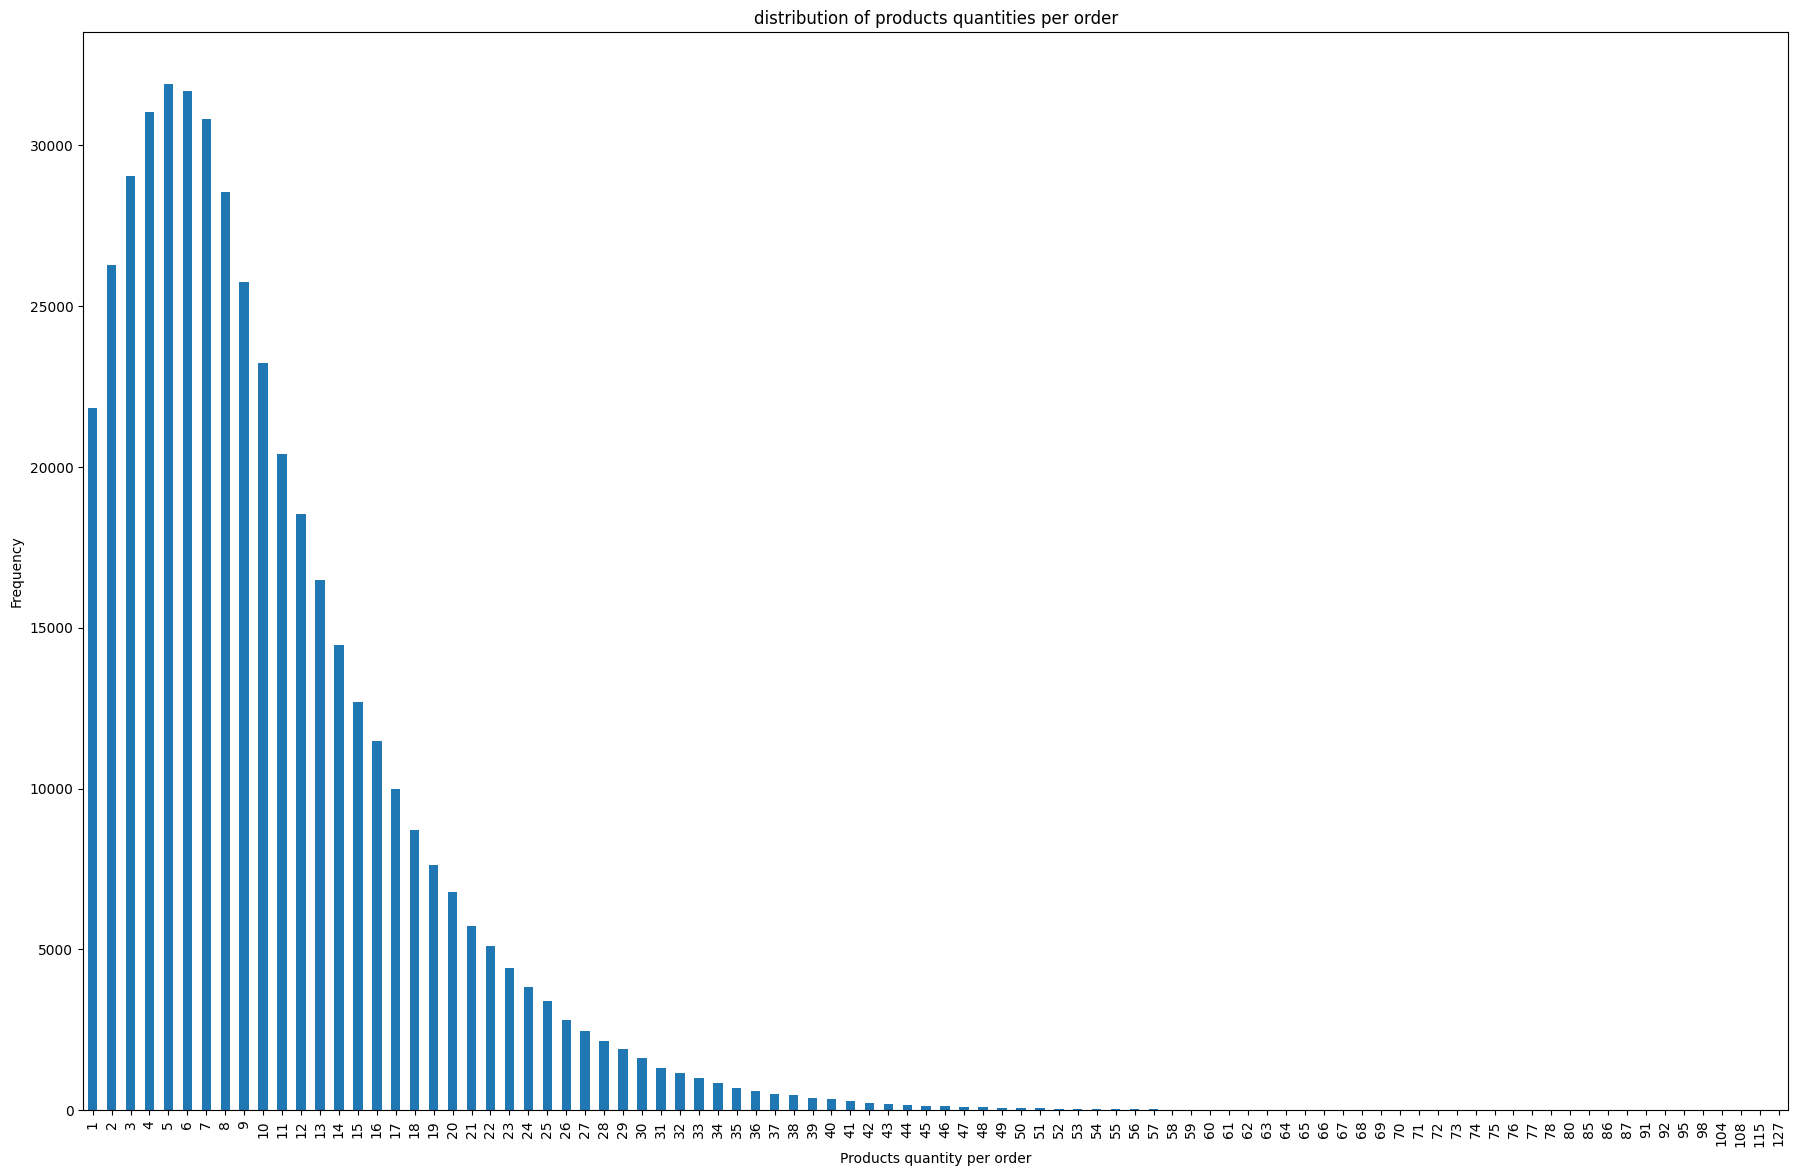

In [46]:
#Para obtener un dataframe del número de productos que se tiene en cada orden
quantity_by_order=products_by_order.groupby("order_id")["product_id"].count().reset_index()
quantity_by_order.columns=["order_id","frequency"]
#Para obtener un dataframe que genere la frecuencia con que se presenta cada posible valor de número de productos por orden
distribution_quantities_per_order=quantity_by_order["frequency"].value_counts().reset_index()
distribution_quantities_per_order.columns=["products_quantity_per_order","frequency"]
#Ordenar el último dataframe generado, en orden creciente, respecto posibles valores de número de artículos por orden
distribution_quantities_per_order.sort_values(by="products_quantity_per_order",ascending=True,inplace=True)
#impresión de gráfica de barras entre {posibles valores de número de productos por orden} vs {frecuencia en las órdenes}
distribution_quantities_per_order.plot(kind="bar",x="products_quantity_per_order",y="frequency",xlabel="Products quantity per order",ylabel="Frequency",title="distribution of products quantities per order",figsize=[22,14],legend=False)
plt.show()

Escribe aquí tus conclusiones
La tendencia está en comprar entre 5 y 6 productos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho, el resultado es correcto, los usuarios suelen pedir alrededor de 10 articulos
</div>


### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

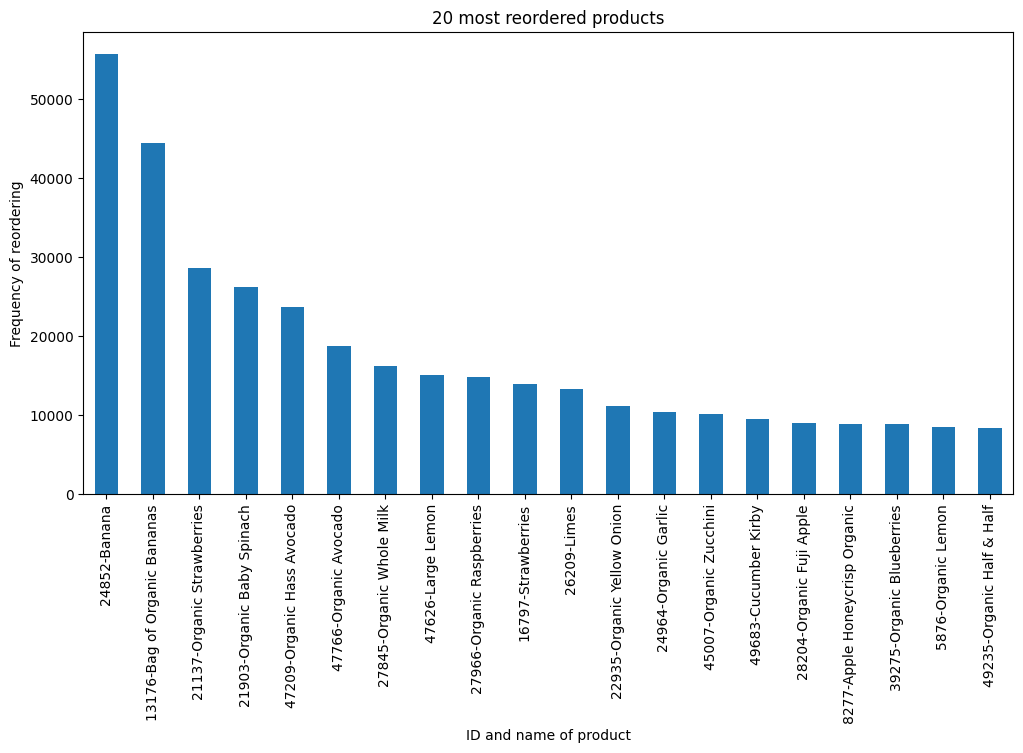

In [47]:
#Generación de un nuevo dataframe con el filtrado de todos los productos que fueron reordenados
reordered_products = products_by_order[products_by_order['reordered'] == 1]
#Generación de un nuevo dataframe con la frecuencia con la que un producto fue reordenado mediante size en cada grupo
reorder_frequency = reordered_products.groupby('product_id').size().reset_index(name='reorder_count')
#Fusión del dataframe de detalles del producto con el dataframe generado en paso anterior para juntar el detalle de nombre e ID de productos
product_details=product_details.merge(reorder_frequency,on="product_id",how="left")
#Ordenamiento del dataframe anterior, en orden descendente, de la frecuencia de reordenamiento de producto. A su vez, extracción de primeros 20 elementos
top_reordered = product_details.sort_values('reorder_count', ascending=False).head(20)
#Concatenado de id y nombre de producto para efectos del resultado esperado
top_reordered["id_and_name"]=top_reordered["product_id"].astype(str)+"-"+top_reordered["product_name"]
#Impresión de gráfica de barras de {nombre e ID de producto} vs {Frecuencia de reordenamiento del producto}
top_reordered.plot(kind="bar",x="id_and_name",y="reorder_count",xlabel="ID and name of product",ylabel="Frequency of reordering",title="20 most reordered products",figsize=[12,6],legend=False)
plt.show()

Escribe aquí tus conclusiones
Percibo una similitud de los mismos productos que se obtuvo en la lista de los 20 productos más populares.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/> 
Buena manera de mostrar los resultados, los productos naturales son consistentemente los más vendidos
</div>


### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [48]:
#Generación de un dataframe que tenga el listado de productos y el número de ocasiones que fue solicitado en las órdenes
total_orders_per_product = products_by_order.groupby('product_id').size().reset_index(name='total_times_ordered')
#Generación de un dataframe que tenga el filtrado de únicamente los productos que fueron reordenados y cuántas veces fueron reordenados, cada uno
reorders = products_by_order[products_by_order['reordered'] == 1].groupby('product_id').size().reset_index(name='reorder_count')
#Fusión de los dataframes generados anteriormente con base en el ID del producto.
reorder_proportion = total_orders_per_product.merge(reorders, on='product_id', how='left')

#Llenado de los valores nulos de la columna "reorder count" debido al tipo de fusión generada en el paso anterior
#Esto ocurre debido a que puede haber productos que nunca hayan sido reordenados, por lo que pueden no existir en el dataframe de los productos que fueron reordenados.

reorder_proportion['reorder_count'] = reorder_proportion['reorder_count'].fillna(0)
#Generación de nueva columna que calcula la proporción de las veces que los productos se pidieron y se volvieron a pedir
reorder_proportion['reorder_proportion'] = reorder_proportion['reorder_count'] / reorder_proportion['total_times_ordered']
#impresión de una muestra de 20 elementos del Dataframe anterior, mostrando ID de producto y su respectiva proporción
print(reorder_proportion[["product_id","reorder_proportion"]].sample(20))

       product_id  reorder_proportion
18259       19927            0.285714
34077       37164            0.560976
39322       42897            0.722222
1984         2173            0.000000
11537       12658            0.478873
11903       13049            0.388889
45177       49261            0.666667
21791       23759            0.000000
26112       28451            0.892857
34283       37394            0.400000
18136       19790            0.000000
36563       39895            0.000000
14461       15821            0.500000
16876       18436            0.560000
17718       19338            0.823529
18731       20435            0.636364
5030         5498            0.600000
37947       41413            0.800000
12751       13951            0.518293
12441       13625            0.285714


Escribe aquí tus conclusiones
En este caso, considerando que estamos hablando de conocer una proporción relacionada a que el producto sea reordenado, por cada producto, el tipo de gráfica más ideal para este tipo de información sería de barras, pero al ser una lista muy extensa de valores posibles para el eje x, solo se dejará como la muestra de la lista de todos los id's de producto y su respetiva proporción de reordenamiento. 
Después de una repetición iterativa múltiple de extraer 20 elementos aleatorios de la lista, se puede presentir que sí hay productos que tienen una proporción de 1, lo cual podría estar relacionado a productos que tiendan a ser generalmente imprescindibles enla canasta básica de los usuarios, y que eso lleve a que siempre sea un producto reordenado por cada orden del cliente. Por decir algunos ejemplos, está el producto con Id "1809".

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [49]:
#Fusión de loas dataframes de listado de productos por orden y de las órdenes por usuario para tener un dataframe de detalle de cada órden
orders_detailed=products_by_order.merge(customer_orders,on="order_id",how="left")
#Generación de dataframe que detalla el número de productos diferentes en total que ha ordenado cada usuario
total_products_ordered=orders_detailed.groupby("user_id")["product_id"].nunique().reset_index(name="different_products_number_ordered")
#Generación de dataframe que detalla el número de productos diferentes en total que ha reordenado cada usuario
total_products_reordered=orders_detailed[orders_detailed["reordered"]==1].groupby("user_id")["product_id"].nunique().reset_index(name="different_products_number_reordered")
#Llenado de los valores nulos de la columna "different_products_number_reordered" debido al tipo de fusión generada en el paso anterior
total_products_reordered["different_products_number_reordered"].fillna(0,inplace=True)
#Fusión de los dataframes de número de productos diferentes que han sido solicitados y reordenados
ordered_reordered_by_user=total_products_ordered.merge(total_products_reordered,on="user_id",how="inner")
#Generación de columna adicional que determina la proporción de productos que se volvieron a pedir, respecto del total de productos pedidos
ordered_reordered_by_user["proporcion"]=ordered_reordered_by_user["different_products_number_reordered"]/ordered_reordered_by_user["different_products_number_ordered"]
#Impresión de una muestra de 30 elementos de usuarios y su respectiva proporción
print(ordered_reordered_by_user[["user_id","proporcion"]].sample(30))

        user_id  proporcion
64216     99636    0.777778
37537     58378    0.235294
117301   181946    0.500000
58073     90144    0.444444
13790     21394    0.214286
67073    103988    0.333333
81644    126779    0.500000
80583    125098    0.880952
78067    121111    0.400000
30937     48036    0.700000
20724     32208    0.842105
85945    133464    0.513514
48840     75859    0.400000
47303     73488    0.250000
84177    130722    0.421053
27271     42280    0.833333
80977    125690    0.545455
94567    146832    0.700000
118890   184373    0.769231
12945     20070    1.000000
28303     43912    0.878788
48764     75746    0.629630
72305    112017    0.677419
107744   167127    0.470588
80483    124940    0.857143
32649     50690    0.315789
60874     94450    0.523810
83661    129928    0.862559
51715     80299    0.583333
9740      15022    0.625000


Escribe aquí tus conclusiones.
En este caso, considerando que estamos hablando de conocer una razón entre el número de productos que fueron reordenasdos y el total de productos ordenados, por cada usuario, el tipo de gráfica más ideal para este tipo de información sería de barras, pero al ser una lista muy extensa de valores posibles para el eje x (por la extensa lista de clientes del Dataframe), solo se dejará como la muestra de la lista de algunos de los id's de usuario y su respetiva proporción de entre productos reordenados y el total de productos ordenados. 
Después de una repetición iterativa múltiple de extraer 30 elementos aleatorios de la lista, se puede percibir que existe un conjunto de usuarios que tienen una proporción igual a 1, lo que en otras palabras significa que existen usuarios que el total de productos que siempre solicitaron es el total de productos que siempre reordenaron, sin ninguna diferencia de producto menos o adicional. Por decir algunos ejemplos, están los ususarios con ID "3891" y "179055".

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de realizar las proporciones
</div>


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

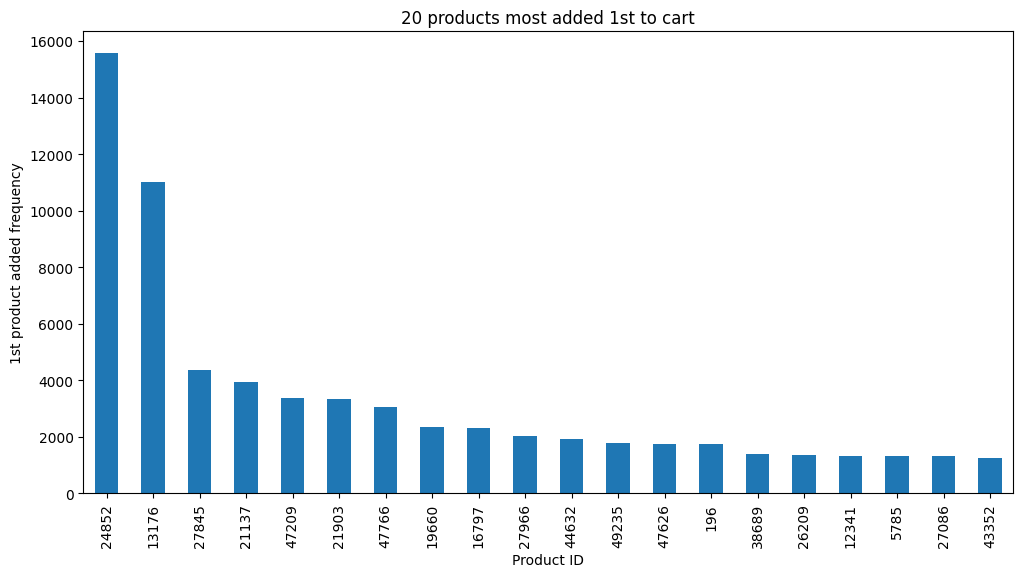

In [50]:
#Generación de dataframe con solo los productos que fueron ordenados en primer lugar en cada orden
first_products_added=products_by_order[products_by_order["add_to_cart_order"]==1]
#Uso del dataframe anterior para generar otro que enliste a cada producto y su número de ocasiones que fue ordenado en primer lugar.
most_first_products_added=first_products_added.groupby("product_id").size().reset_index(name="1st_added_frequency")
#Ordenamiento del dataframe anterior para tener hasta arriba a los productos que fueron agregados en primer lugar con mayor frecuencia y extracción de los primeros 20 elementos.
most_first_products_added_20=most_first_products_added.sort_values(by="1st_added_frequency",ascending=False).head(20)
#impresión de gráfica de barras de {id de los 20 productos más agregados en primer lugar} vs {frecuencia con la que fueron agregados en priumer lugar}
most_first_products_added_20.plot(kind="bar",x="product_id",y="1st_added_frequency",xlabel="Product ID",ylabel="1st product added frequency",title="20 products most added 1st to cart",figsize=[12,6],legend=False)
plt.show()

Escribe aquí tus conclusiones.
Se puede percibir que con una diferencia considerable, los productos con ID "24852", y un poco por debajo el producto con ID "13176", son el tipo de productos que regularmente los usuarios suelen agregar primero al carrito. Motivos puede haber una gran variedad. Ya sea que sean productos que se acaban rápido, productos que son imprescindibles en la canasta básica y que por ello tengan prioridad o que sea el tipo de producto que la gente se acuerde primero en mayor medida al momento de comenzar a adicionar productos al carrito. Lo que sí es reconocible es que, independientemente de los motivos de por qué esos productos tengan una mayor frecuencia en ser añadidos primero al carrito respecto a otros productos, es reconocible que la diferencia es considerable, puesto que estamos hablando que en estos dos productos se tiene una frecuencia de números de 5 dígitos, mientras que el resto de productos tienen una frecuencia de números de 4 dígitos y menores. 


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Una vez más los productos orgánicos estan en el top de la lista<br/>
</div>


### Conclusion general del proyecto:

Todo el contenido analizado hasta el momento respecto a las funcionalidades que tiene el código Python para la lectura, preprocesamiento y análisis de datos resulta muy importante porque cada uno de estos aprendizajes tiene una fuerte relación con el otro, la falta de uno de estos procesos haría imposible la labor del analista, y el no efectuar cualquiera de las tres etapas del análisis de datosa llevaría a la generación de conclusiones erroneas, que al final eso conllevaría en el mundo real a decisiones incorrectas relacionadas a insights falsos.

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las conclusiones a las que llegaste son buenas y los procedimientos realizados son correctos. Considero que este es un proyecto que se empieza a asemejar más a algún proyecto que te pidan en un trabajo, a partir de análisis de este tipo se pueden diseñar estrategias de marketing específicas para ciertos productos o se pueden optimizar los procesos internos para tener disponibles más rápidamente los productos que se venden más seguido.<br/>
    

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen buenas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
    
</div>

